# Hashing Data With Python:
### How to use the ```Hashlib```, ```secrets```, and ```HMAC``` libraries to encrypt protected data.


**Time**

- Teaching: 30 min

**Questions**:

- "How can I encrypt a selection of variables in a dataset to protect sensitive information?"

**Learning Objectives**:

- "Understand what a hashing and a hash is."
- "Understand salt and what salting does."
- "Generate random hexidecimal tokens."
- "Write function to create random salt values."
- "Apply keyed hashing to a pandas dataframe."
* * * * *

## Introduction: 

Hashing a process where you take any combination and length of characters (numbers, letters, special characters) and transform them into a unique, unintelligible pattern of a specified number of characters and numbers.Hashing can be used to maintain the integrity of organized data while masking sensitive, personally identifiable information (PII).  A hash function is used to generate new values according to a mathematical algorithm and hashed values are those that have been replaced with meaningless characters.

A good hash function uses a one-way hashing algorithm, so that the hash cannot be converted back into the original key.


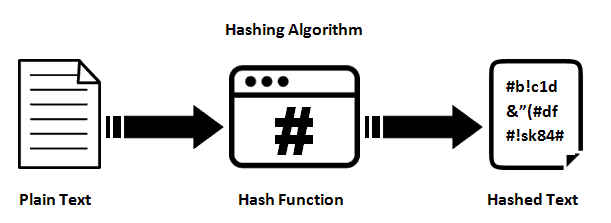

Hashing is most commonly used to implement **hash tables**. A hash table stores key/value pairs in the form 
of a list where any element can be accessed using its index. Since there is no limit to the number of 
key/value pairs, we can use a hash function to map keys to the size of a data table and the hash value 
becomes the index for a given element.

In many cases, we will want multiple instances of the same value, like an email address or a person's name, to have the same hashed value. Doing this allows us to identify unique individuals and match associated data without knowing the true values contained in the sensitive variables.

**Salting** is an additional process that creates another level of safeguard by adding random data to the input of a hash function to guarantee a unique output of the hash. A [cryptographic salt](https://en.wikipedia.org/wiki/Salt_(cryptography)) is made up of random bits added to each password instance before its hashing. Hashing with the same salt will always return the same hash output for the same input. 


Precautions to consider when hashing with salt: 

            - Don't use the same salt for every value in the table.
            - Protect the salt, since with it one can un-hash the data.

Hashing is a one way process, we typically don't unhash protected values. We store the restricted use data on a secure server and distribute the hashed data to a less secure server/computer for analysis. 


>To begin, we import the necessary libraries and generate our **salt** value.

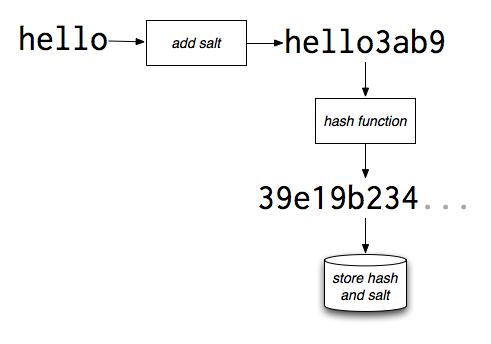

In [2]:
# import necessary libraries.

import hashlib # secures hashes and message digests
import hmac    # keyed hashing for message authentication
import secrets # generates random token
import math    # access to mathematical functions
import sys     # access to system specific parameters and functions


In [3]:
# declare variables for salt value. 
token_hex = None 
token_int = None
token_bit_count = -1
token_byte_count = -1 
token_bytes= None 
salt_hash = None
salt = None

# create random hexadecimal token of default size (32 bytes, 64 hex digits) 
token_hex = secrets.token_hex()

# view the token and its length
print( "token: " + token_hex + "; length = " + str( len( token_hex ) ) )


token: b618e5c9be5aec7d4c61ea7f83af533b4c9a72d13982a4b6c2a70ce01c5b09f1; length = 64


In [4]:
# Our token is a string, and we must convert to an integer
type(token_hex)

str

In [5]:

# convert the token to an integer 
token_int = int(token_hex, 16) # hex is base 16
print( "Default token int: " + str( token_int ) )


Default token int: 82364928710618598337695565303453417498907270224657452692782044685412394011121


> You may be asking, "what are base-16 numbers?" _Excellent question!_ The base value of a number system is the number of different values the set has before repeating itself. Here is a short [explanation video](https://www.youtube.com/watch?v=ZL-LhaaMTTE) highlighting the differences between binary, hexidecimal, and those base-10 numerical systems we are most familiar with. 

In [6]:
# get bit count
token_bit_count = token_int.bit_length()
print( "token bit count = " + str( token_bit_count ) )

# get byte count
token_byte_count = token_bit_count / 8 
token_byte_count = math.ceil( token_byte_count ) 
token_byte_count = int(token_byte_count ) 
print( "token byte count = " + str(token_byte_count ) )

# convert the integer value to bytes
token_bytes = token_int.to_bytes( token_byte_count, byteorder = sys.byteorder ) 
print("token bytes = " + str( token_bytes ) )

# Use hashlib to create a salt value from the token
salt_hash = hashlib.sha256( token_bytes ) 
salt = salt_hash.hexdigest() 
print( "salt: " + str( salt ) + "; type = " + str(type( salt ) ) )

token bit count = 256
token byte count = 32
token bytes = b'\xf1\t[\x1c\xe0\x0c\xa7\xc2\xb6\xa4\x829\xd1r\x9aL;S\xaf\x83\x7f\xeaaL}\xecZ\xbe\xc9\xe5\x18\xb6'
salt: c9d57431dc592b476c27f330651c9d1af83515c4203e0cb651e1e9285836a1a6; type = <class 'str'>


In [7]:

# declare variables 
salt_IN = None
message_IN = None 
sha256_instance = None 
encoded_passphrase = None
passphrase_hash = None
encoded_message = None
hmac_key_hash_instance = None
hmac_key = None

# set salt (from above) and message
salt_IN = salt
message_IN = "salty_dog_at_sea"

# convert salt to encryption key
# get hasher 
sha256_instance = hashlib.sha256()

# update it with the message
encoded_passphrase = salt_IN.encode( "utf-8" ) 
sha256_instance.update(encoded_passphrase )

# get digest 
passphrase_hash = sha256_instance.digest() 

# store as key
hmac_key_hash_instance = sha256_instance 
hmac_key = passphrase_hash

# ==> hash message with HMAC and salt key
# encode 
encoded_message = message_IN.encode( "utf8" )

# make hmac_instance with key, message, and hash function.
hmac_instance = hmac.new( hmac_key, encoded_message, digestmod = hashlib.sha256 )

# perform hash. 
value_OUT = hmac_instance.hexdigest()

In [8]:
value_OUT

'4abc2f860ff419680f89cb23d156ff22e8e8f21b9e7e277602e63930befa2ac6'

## Create function to generate a random salt string value using the `secrets` library.

In [9]:

def get_random_salt_str():
    '''
    Generate salt using secrets library
    '''

    # declare variables 
    token_hex = None 
    token_int = None
    token_bit_count = -1
    token_byte_count = -1 
    token_bytes= None 
    salt_hash = None
    salt = None

    # Create random hexadecimal token of default size (32 bytes, 64 hex digits) 
    token_hex = secrets.token_hex()

    # hex is base 16
    token_int = int(token_hex, 16) 
   
    # get bit count of token
    token_bit_count = token_int.bit_length()
 

    # get byte count of token
    token_byte_count = token_bit_count / 8 
    token_byte_count = math.ceil( token_byte_count ) 
    token_byte_count = int(token_byte_count ) 
    

    # convert the integer value to bytes
    token_bytes = token_int.to_bytes( token_byte_count, byteorder = sys.byteorder ) 

    # Use hashlib to create a salt value from the token
    salt_hash = hashlib.sha256( token_bytes ) 
    salt = salt_hash.hexdigest() 
    
    # return random salt value
    return salt


### The function should always return a new, random string. Try running the next few blocks to test out the randomness.

In [10]:
# Run the function a to test randomness
get_random_salt_str()

'f828a0b78849985b59b4447c14ca762672f37b1ffe600a19e86fd2b89be94be2'

In [11]:
# Again with a range of values
for i in range(0,10):
    print(str(i), get_random_salt_str())
    

0 4dd05d7d62ab4304166f67faef88b5015dec3b9971cd6232cca7f87b5486a8ba
1 674236a2c53a6560a5da02fe9a50aea8930f645c0f82c1f9d4ff7d0c6c38ebf1
2 be1fa340dcb028aa0cf93e4b7fd67623cf88c93f2ab41a0486d32aa31f3dde8d
3 42bc46d04b0a235f386e74f9f2f4fe92c3586d7dd6f1baa3bbccc4805b078dc5
4 76293f9bb8200e200897d67c4386749c6f70927a063fb1d181c60a85077427e0
5 d6c359f0555c6b4cd1cbb8f092cd4ff8d8c7e048c68a92b40949e4863361b00e
6 1c3cf3bb3496fafdd2eb9ad2dec38179d25428226574b68ada3fd5c452e9d177
7 15ae53b532930cde54a54ea7f93bec28e3e9ea1ddd0771f003d7bdc6b3109ae2
8 40b299cde303bbac0a2a12452d63b3a78db3c6fceb1f26c28ba2ed55182c6790
9 1bff46648196ee6cc36b8e6c58cc360534d55021a3c177eb857ac1108ef2d796


Create a function to return a hashed value given a specified salt value

In [12]:

def get_hashed_value(value_to_hash, salt):

    '''Hash using a salt and HMAC'''
    
    # set salt and message
    salt_IN = salt
    message_IN = value_to_hash
    
    # declare variables 
    sha256_instance = None 
    encoded_passphrase = None
    passphrase_hash = None
    encoded_message = None
    hmac_key_hash_instance = None
    hmac_key = None

    ######################################
    # ==> convert salt to encryption key
    ######################################
    # get hasher 
    sha256_instance = hashlib.sha256()

    # update it with the message
    encoded_passphrase = salt_IN.encode( "utf-8" ) 
    sha256_instance.update(encoded_passphrase )

    # get digest 
    passphrase_hash = sha256_instance.digest() 

    # store as key
    hmac_key_hash_instance = sha256_instance 
    hmac_key = passphrase_hash

    ##########################################
    # ==> hash message with HMAC and salt key
    ###########################################
    # encode 
    encoded_message = message_IN.encode( "utf8" )

    # make hmac_instance with key, message, and hash function.
    hmac_instance = hmac.new( hmac_key, encoded_message, digestmod = hashlib.sha256 )

    # perform hash. 
    value_OUT = hmac_instance.hexdigest()
    
    return value_OUT


The same value hashed with the same salt will return the __same__ hashed value.

In [13]:
print("pizza, hashed:", get_hashed_value('pizza', 'salty_salt_string'))
print("pizza, hashed:", get_hashed_value('pizza', 'salty_salt_string'))

pizza, hashed: cd91092c31851a8d0ea44c7a672ea2340bd9ec889dc8befb83d11821fc2805c4
pizza, hashed: cd91092c31851a8d0ea44c7a672ea2340bd9ec889dc8befb83d11821fc2805c4


The same value hashed with a different salt will return a __different__ hashed value.

In [14]:
print("ice_cream, hashed:", get_hashed_value('ice_cream', 'salty_salt_string'))
print("ice_cream, hashed:", get_hashed_value('ice_cream', 'salty_salt_string'))

ice_cream, hashed: ef94d36b4235e47239f6e8942e11505712b87f3e842ffc70bd77f50a80a057d5
ice_cream, hashed: ef94d36b4235e47239f6e8942e11505712b87f3e842ffc70bd77f50a80a057d5


The same value hashed with a __different__ salt will return a __different__ hashed value.

In [15]:
print("pizza, hashed:", get_hashed_value('pizza', get_random_salt_str()))
print("pizza, hashed:", get_hashed_value('pizza', get_random_salt_str()))
print("ice_cream, hashed:", get_hashed_value('ice_cream', get_random_salt_str()))
print("peanut, hashed:", get_hashed_value('peanut', get_random_salt_str()))

pizza, hashed: c641893a9d8d5a11340df3654122812e31bd6a6e7df9e7b66923f13ba7bbdab5
pizza, hashed: f6a054ebe9fba28d7681b7c8444c522c188928699a6dc922455c98b31355c264
ice_cream, hashed: 926e8a873d6f379b21e9e6e2dab0ebbf3c848208da88102ce4f7275af01e14e2
peanut, hashed: 6b13b1ff32cfb72b97d36bfbd3efe0c072101604e7aaee3e07ab0054f312c116


> These are the basics of hashing and salting. Let's explore a hands on example with `pandas`.  

## Applying Keyed Hashing to a pandas dataframe

In [16]:

# Import pandas library
import pandas as pd

# Create a test dataframe
data = {'email':['albert@gmail.com', 'brea@hotmail.com', 'titan@live.com', 'jane@yahoo.com','albert@gmail.com'],
        'gender':['male', 'male', 'male', 'male','them'],
        'age':[20, 21, 19, 18, 66],
        'income':[25000, 34000, 31000, 10000, 50000],
        'country':['Germany', 'Germany', 'Germany', 'Sweden','USA'],
        'userid':['101', '666', '3344', '1212','101'],
        } 
df = pd.DataFrame(data)

# Print out dataframe
print("INPUT DF")
print(df)


INPUT DF
              email gender  age  income  country userid
0  albert@gmail.com   male   20   25000  Germany    101
1  brea@hotmail.com   male   21   34000  Germany    666
2    titan@live.com   male   19   31000  Germany   3344
3    jane@yahoo.com   male   18   10000   Sweden   1212
4  albert@gmail.com   them   66   50000      USA    101


In [17]:

# Function that encyrpts values in certain columns of a dataframe
def apply_hashing(the_val, the_colname):
    global key_df
  
        # If we have not already hashed this value, hash it
    if the_val not in key_df[key_df.hashed_col==the_colname]['hashed_IN'].values:
        
        # First create a random salt just for this email
        salt = get_random_salt_str()
        
        # Now do the salted hashing
        hashed_val = get_hashed_value(the_val, salt)
        
        # save a lookup table of the secret bits
        key_df = key_df.append({'hashed_col': the_colname, 'hashed_IN' : the_val, 'hashed_val' : hashed_val, 'salt' : salt},  
                ignore_index = True)
        
        # return the hashed email
        return hashed_val
    
    else:
        # else just return the hashed email
        #return key[the_colname]
        print("\n", the_val, 'HASHED ALREADY - CHECK OUTPUT HASHED DF to make sure values are the same')
        
        return key_df[((key_df.hashed_col==the_colname) & (key_df['hashed_IN'] == the_val))]['hashed_val'].squeeze()
    

#### Now to implement the hashing and create a dataframe to hold our secret sauce.
Note that you would never (ever) want to store the secretsauce dataframe on the same server as the hashed data, that defeats the whole of purpose of using encryption!

In [18]:

# This lookup table is also not necessary if you have the unhashed data.
key_df = pd.DataFrame(columns = ['hashed_col', 'hashed_IN', 'hashed_val', 'salt']) 

# hash the email column 
the_colname = 'email'
df.email = df.email.apply(lambda x: apply_hashing(x, the_colname))

# hash userid column
the_colname = 'userid'
df.userid = df.userid.apply(lambda x: apply_hashing(x, the_colname))


print("\n\nHASHED DF")
print(df)

print("\n\nSECRET SAUCE")
key_df


 albert@gmail.com HASHED ALREADY - CHECK OUTPUT HASHED DF to make sure values are the same

 101 HASHED ALREADY - CHECK OUTPUT HASHED DF to make sure values are the same


HASHED DF
                                               email gender  age  income  \
0  99d09411bbd5e550ab1e448cedaf1a6d0c8362197ce10d...   male   20   25000   
1  44879dcea56fb6eb3d24106d2536620cf6328767fd79f7...   male   21   34000   
2  f5ed3247bd36673018d0fe022df6de471b015520910857...   male   19   31000   
3  106c820271b5829393fb7872114ea69b1a6c305a951598...   male   18   10000   
4  99d09411bbd5e550ab1e448cedaf1a6d0c8362197ce10d...   them   66   50000   

   country                                             userid  
0  Germany  0dfc3977c3e35ddd3e0088a92c26bd6849a69ba66d5c6c...  
1  Germany  d0acac1cf2311702b43b7ca4649a3aca2a27480304bd79...  
2  Germany  eb91bbc51a501c35ea905f60f4e60d13e7e49c52d4fac4...  
3   Sweden  7ceb1743e60ebb24cada5c0e76936b36c02f3a962a20d4...  
4      USA  0dfc3977c3e35ddd3e0088a92c26

,hashed_col,hashed_IN,hashed_val,salt
0,email,albert@gmail.com,99d09411bbd5e550ab1e448cedaf1a6d0c8362197ce10d...,d32ef15157f4e3ce37edf5b32765acaac92f60677276c0...
1,email,brea@hotmail.com,44879dcea56fb6eb3d24106d2536620cf6328767fd79f7...,8af10c25b2cf0bcd732b58a65f07a7394c518979f6daa9...
2,email,titan@live.com,f5ed3247bd36673018d0fe022df6de471b015520910857...,192700ed6c235110f550a5c16d62a8f0b45d52da974af5...
3,email,jane@yahoo.com,106c820271b5829393fb7872114ea69b1a6c305a951598...,60ba676195182ca93dfaaf4a8ad93e231930386e60bf37...
4,userid,101,0dfc3977c3e35ddd3e0088a92c26bd6849a69ba66d5c6c...,9ff374950211fae4af30a2f2661cf070d5567a97d2d7d3...
5,userid,666,d0acac1cf2311702b43b7ca4649a3aca2a27480304bd79...,3b44e1f2a08928076c7d7882e13df071a535891ec7d494...
6,userid,3344,eb91bbc51a501c35ea905f60f4e60d13e7e49c52d4fac4...,552c169e0411b5afa96bbeaa851d0652cb4a249165418e...
7,userid,1212,7ceb1743e60ebb24cada5c0e76936b36c02f3a962a20d4...,05330cac1cb2260dc51688b0cbec86e9f9240dbcf77ebd...



Let's do this all again, but a bit more simply

In [19]:

#import libraries 
import hashlib
import secrets

In [20]:
# Create test dataframe
data = {'email':['albert@gmail.com', 'bree@hotmail.com', 'titan@live.com', 'epic@yahoo.com','albert@gmail.com'],
        'gender':['male', 'female', 'male', 'female','male'],
        'age':[20, 21, 19, 18,20],
        'income':[25000, 34000, 31000, 10000,15000],
        'country':['Germany', 'Germany', 'Germany', 'Sweden','Germany']} 
df = pd.DataFrame(data)

# Display test dataframe
print("INPUT DF")
print(df)


INPUT DF
              email  gender  age  income  country
0  albert@gmail.com    male   20   25000  Germany
1  bree@hotmail.com  female   21   34000  Germany
2    titan@live.com    male   19   31000  Germany
3    epic@yahoo.com  female   18   10000   Sweden
4  albert@gmail.com    male   20   15000  Germany


In [21]:

def get_hashed_value(the_val, the_colname):
    
    '''A function that will has a given value'''
    
    global key_df  # Assumes we maintain a lookup table of already hashed values
    
        # If we have not already hashed this value, hash it
    if the_val not in key_df[key_df.hashed_col==the_colname]['hashed_IN'].values:     
        
        # First create a random salt just for this value
        salt = secrets.token_hex()
        
        # Now hash the salted value
        sha3 = hashlib.sha3_512()         # Hash algorithm
        data = salt + str(the_val)        # value to salt
        sha3.update(data.encode('utf-8')) # Hash the value
        hexdigest = sha3.hexdigest()      # Return the hexdigest of the salted output value
        
        # save value and hashed value to a lookup table of the secret bits
        key_df = key_df.append({'hashed_col': the_colname, 'hashed_IN' : the_val, 'hashed_val' : hexdigest, 'salt' : salt},  
                ignore_index = True)
        
        # return the hashed value
        return hexdigest
    
    else:
        # else just return the hashed email
        print("\n", the_val, 'HASHED ALREADY - CHECK OUTPUT HASHED DF to make sure values are the same')
        
        return key_df[((key_df.hashed_col==the_colname) & (key_df['hashed_IN'] == the_val))]['hashed_val'].squeeze()


## IMPLEMENT THE HASHING

We use the `key_df` table to make sure the same input values have the same hashed value (needed for data linkage)
Never ever ever would we decide to store this on the same server as the hashed data, because that defeats the whole purpose of encrypting it!

The lookup table is also not necessary if we plan to unhash the data.

In [22]:

# Create DF to hold our secret lookup table.

key_df = pd.DataFrame(columns = ['hashed_col', 'hashed_IN', 'hashed_val', 'salt']) 

# You can hash as many columns as you want
# Make a copy of the input df if you don't want to overwrite the data
df_hashed = df.copy()

# Hashed email values
the_colname = 'email'
df_hashed.email = df_hashed.email.apply(lambda x: get_hashed_value(x, the_colname))

# hashed income values
the_colname = 'income'
df_hashed.income = df_hashed.income.apply(lambda x: get_hashed_value(x, the_colname))


print("\n\nHASHED DF")
print(df_hashed)

print("\n\nSECRET SAUCE")
key_df


 albert@gmail.com HASHED ALREADY - CHECK OUTPUT HASHED DF to make sure values are the same


HASHED DF
                                               email  gender  age  \
0  23c7664365b6cc53d05084e2e549924066428e4497293f...    male   20   
1  2c71853629bf444a4d057a831fb858f942165a8f4ec13a...  female   21   
2  b83e0175ab52f28798344cdee4f2be32bef20b686f2026...    male   19   
3  a719f2e5fb67e2b5517d6420b41bf764e63c5ddaf024d7...  female   18   
4  23c7664365b6cc53d05084e2e549924066428e4497293f...    male   20   

                                              income  country  
0  8a6eb64b10d105b10dc416dc45ea9ac300d06373dbe76b...  Germany  
1  d0e93ee1727efb3e3bb70973c666770b21151bacb50ef7...  Germany  
2  b0d3c25e17b8dd755399b076cda630a7aa98f87d7d1996...  Germany  
3  6c1ce8d0a5a7acd9286561e0c6d85e0037e822119c7c64...   Sweden  
4  043d714ef10a12ad1dc262426fe86f99cede54be033570...  Germany  


SECRET SAUCE


,hashed_col,hashed_IN,hashed_val,salt
0,email,albert@gmail.com,23c7664365b6cc53d05084e2e549924066428e4497293f...,71d88b98ae5a2dd5826110cb0de7ab286230b3b5d7a519...
1,email,bree@hotmail.com,2c71853629bf444a4d057a831fb858f942165a8f4ec13a...,f81384ff186e2cd8ef59f522c88f2fd02572360bcd83e4...
2,email,titan@live.com,b83e0175ab52f28798344cdee4f2be32bef20b686f2026...,9f1fde1b4d1117e64b44bcf7028c3508ebb1896f8c9a03...
3,email,epic@yahoo.com,a719f2e5fb67e2b5517d6420b41bf764e63c5ddaf024d7...,cfa2ff04c2834eae29264865efa4e4201786e45a37e386...
4,income,25000,8a6eb64b10d105b10dc416dc45ea9ac300d06373dbe76b...,9966e949a5ce61e0760f6bdd6da38f8fa77449e241070d...
5,income,34000,d0e93ee1727efb3e3bb70973c666770b21151bacb50ef7...,1bb334824a876c820442293b20270d7c8239a9eeba9581...
6,income,31000,b0d3c25e17b8dd755399b076cda630a7aa98f87d7d1996...,b98379e9932a0ddc2c19d6a53d4257014b64c06bbae46c...
7,income,10000,6c1ce8d0a5a7acd9286561e0c6d85e0037e822119c7c64...,dbc8b144a92bab124ac8c809449e8920ec4546d33ff53e...
8,income,15000,043d714ef10a12ad1dc262426fe86f99cede54be033570...,41647d7c55586529a160583c445d011595e59248b5b53f...



## Wrapping it up

At this point you would check the hashed data `df_hashed`, save it to file, and then use it or share disclosing personally identifiable information. Store the input data and the code you used to hash and salt it on a secure server, but *not in the same server where the hashed data exists*.

That being said, there is always a chance that someone could reverse engineer your hashing if they manage to figure out your hashing and salting method. When employing data security methods with highly restricted use data (P3 and above) your work should always be double-checked by a campus data security professional to be safe.


References :

 https://korniichuk.medium.com/gdpr-guide-2-7c399b44ba3




---
Created by Patty Frontiera, pfrontiera@berkeley.edu
Last updated: 03/01/2022

